In [442]:
import pandas as pd
import matplotlib.pyplot as plt
test_df = pd.read_csv(r'D:\.VScode\SuperAI4\thaiLegal\all_submissions\submission2_old.csv')

In [443]:
pattern = test_df["pattern"].apply(lambda x: int(str(x)[:4]))

In [444]:
unique_pattern = pattern.unique()

# ensemble models

In [445]:
from glob import glob
import os
f1_score_weights = {
    "submission2_old": 0.76278,
    "sub": 0.82,
    # "submission2": 0.8,
    "submission3": 0.7,
    "Top1-0_77": 0.77,
    "Top2-0_76": 0.76
}

all_submissions = []
raw_all_submissions = []
for file in glob(r"D:\.VScode\SuperAI4\thaiLegal\all_submissions\*.csv"):
    print(file)
    # df = (pd.read_csv(file)[["answer"]] * 2 - 1) * f1_score_weights[os.path.basename(file).replace(".csv", "")]
    df = pd.read_csv(file)[["answer"]]
    raw_all_submissions.append(df)
    all_submissions.append((df* 2 - 1) * f1_score_weights[os.path.basename(file).replace(".csv", "")])

D:\.VScode\SuperAI4\thaiLegal\all_submissions\sub.csv
D:\.VScode\SuperAI4\thaiLegal\all_submissions\submission2_old.csv
D:\.VScode\SuperAI4\thaiLegal\all_submissions\submission3.csv
D:\.VScode\SuperAI4\thaiLegal\all_submissions\Top1-0_77.csv
D:\.VScode\SuperAI4\thaiLegal\all_submissions\Top2-0_76.csv


In [446]:
weights_ensemble = pd.concat(all_submissions, axis=1).mean(axis=1)

In [447]:
weights_submission = pd.DataFrame(weights_ensemble)
weights_submission[weights_submission > 0] = 1
weights_submission[weights_submission <= 0] = 0

In [463]:
names = [os.path.basename(file).replace(".csv", "") for file in glob(r"D:\.VScode\SuperAI4\thaiLegal\all_submissions\*.csv")]
names.append("weights_ensemble")
names

['sub',
 'submission2_old',
 'submission3',
 'Top1-0_77',
 'Top2-0_76',
 'weights_ensemble']

In [464]:
names[0]

'sub'

In [502]:
a = pd.concat([raw_all_submissions[0], raw_all_submissions[1], raw_all_submissions[3]], axis=1)
a.columns = ['PhayaThaiBERT', 'WangchanBerta Tokenizer + RoBERTa Model','Symbolic Pre-processing + XLM']
a

,PhayaThaiBERT,WangchanBerta Tokenizer + RoBERTa Model,Symbolic Pre-processing + XLM
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
5830,0,1,0
5831,0,1,0
5832,1,1,0
5833,0,1,0


In [503]:
weight = pd.DataFrame(weights_submission)
weight.columns = ["weights_ensemble"]

<Axes: >

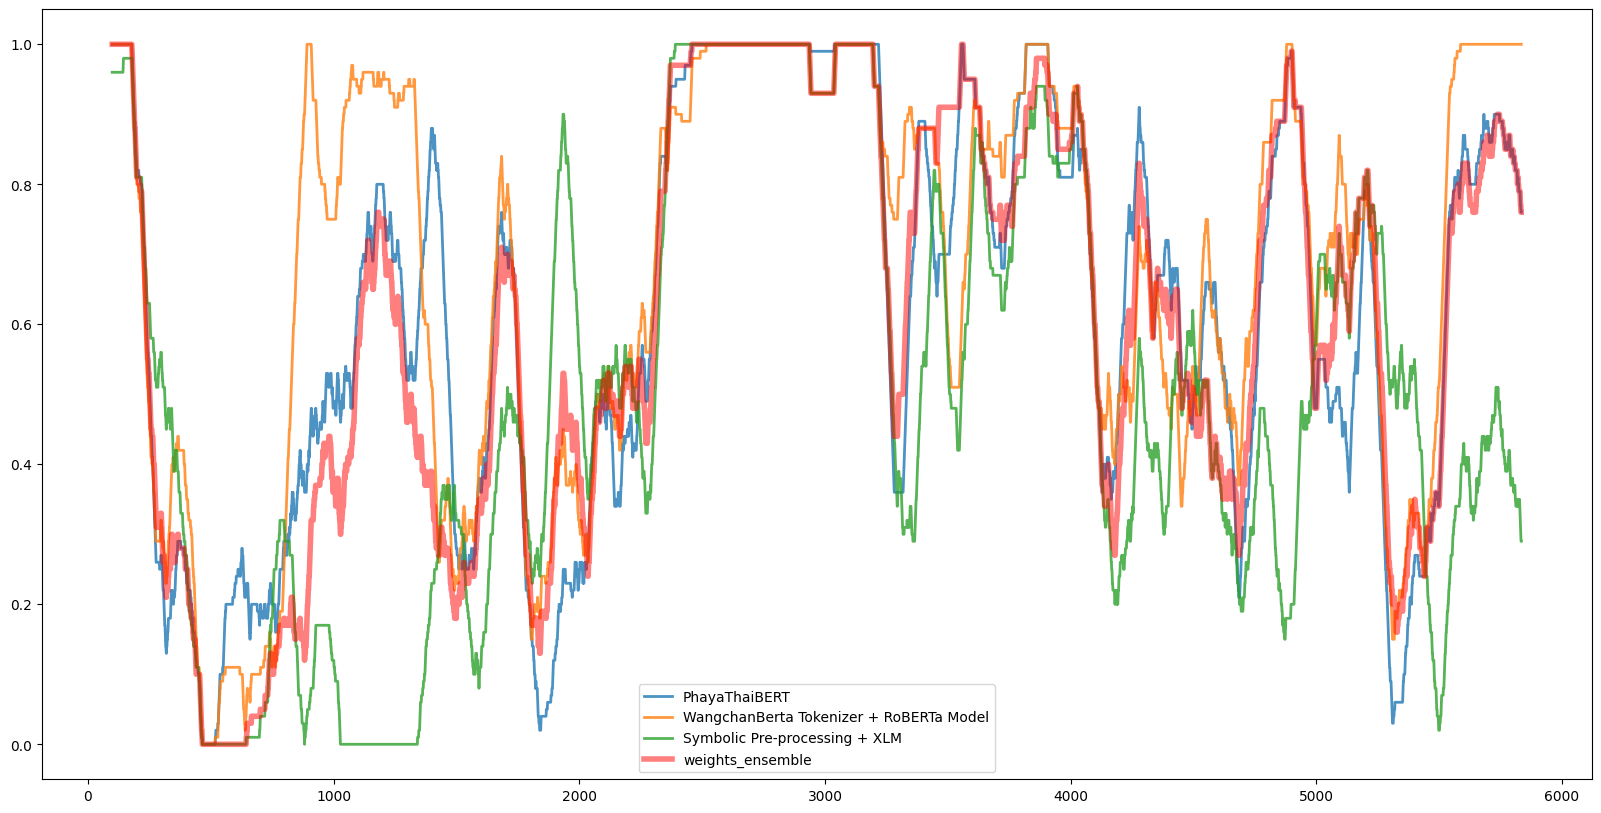

In [504]:
fig = plt.figure(figsize=(20, 10))

a.rolling(100).mean().plot(ax=plt.gca(), linewidth=2, alpha=0.8)
weight.rolling(100).mean().plot(ax=plt.gca(), linewidth=4, alpha=0.5, color = 'r')

<Axes: >

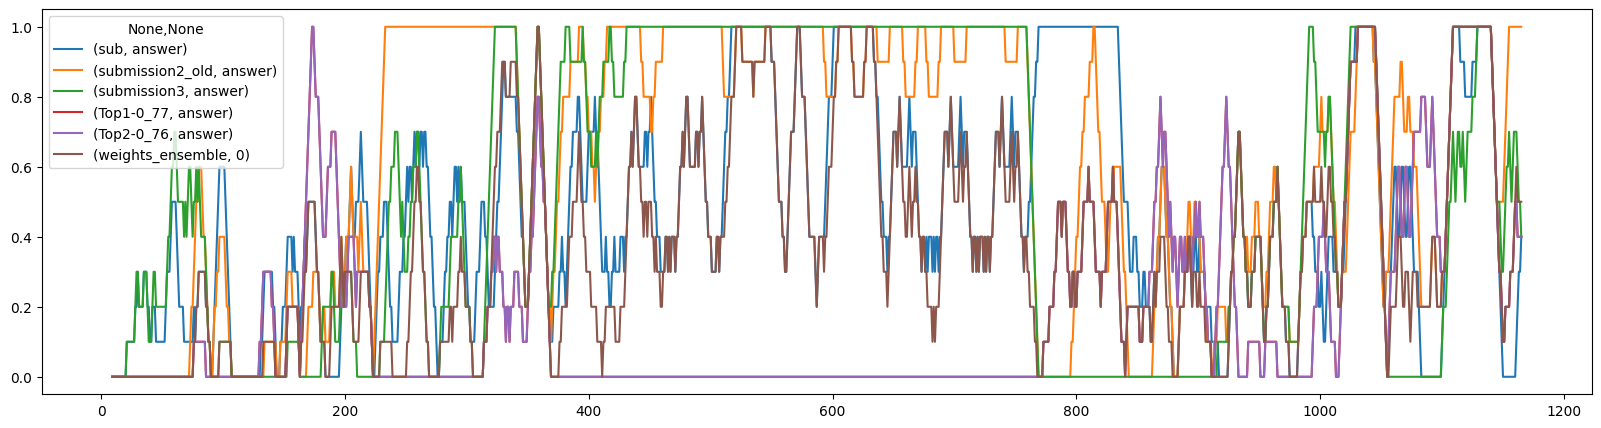

In [450]:
pd.concat([*raw_all_submissions, weights_submission], axis=1, keys=names)[pattern == unique_pattern[3]].reset_index(drop=True).rolling(10).mean().plot(figsize=(20,5))

In [451]:
# weights_submission[pattern == unique_pattern[3]] = raw_all_submissions[-1][pattern == unique_pattern[3]]

<Axes: >

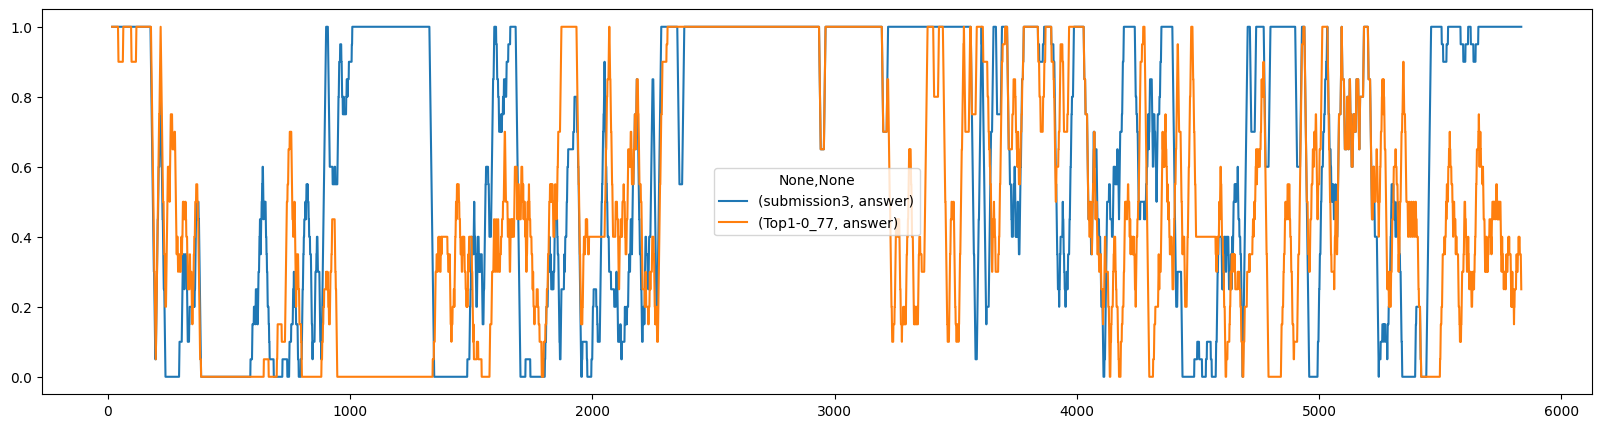

In [453]:
pd.concat([*raw_all_submissions, weights_submission][2:4], axis=1, keys=names[2:4]).rolling(20).mean().plot(figsize=(20,5))

<Axes: >

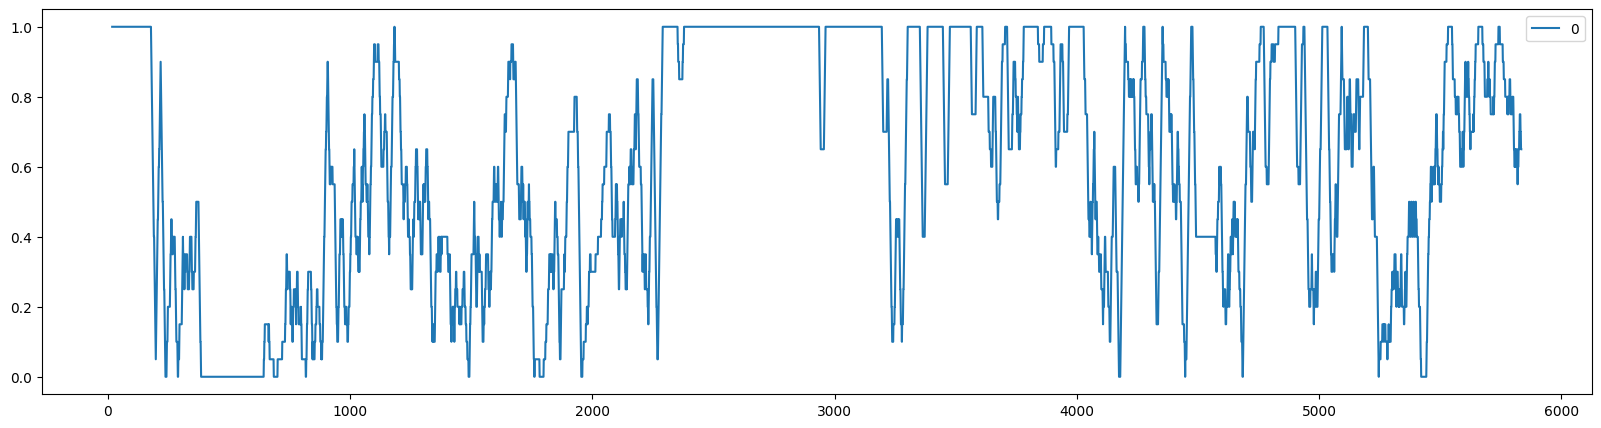

In [454]:
weights_submission.rolling(20).mean().plot(figsize=(20,5))

In [455]:
# for file in glob(r"D:\.VScode\SuperAI4\thaiLegal\all_submissions\*.csv"):
#     print(file)
#     print(pd.read_csv(file)[["answer"]].mean())

In [456]:
weights_submission.mean()

0    0.610797
dtype: float64

In [457]:
final = pd.read_csv(r"D:\.VScode\SuperAI4\thaiLegal\all_submissions\submission2_old.csv")
final["answer"] = weights_submission

<Axes: >

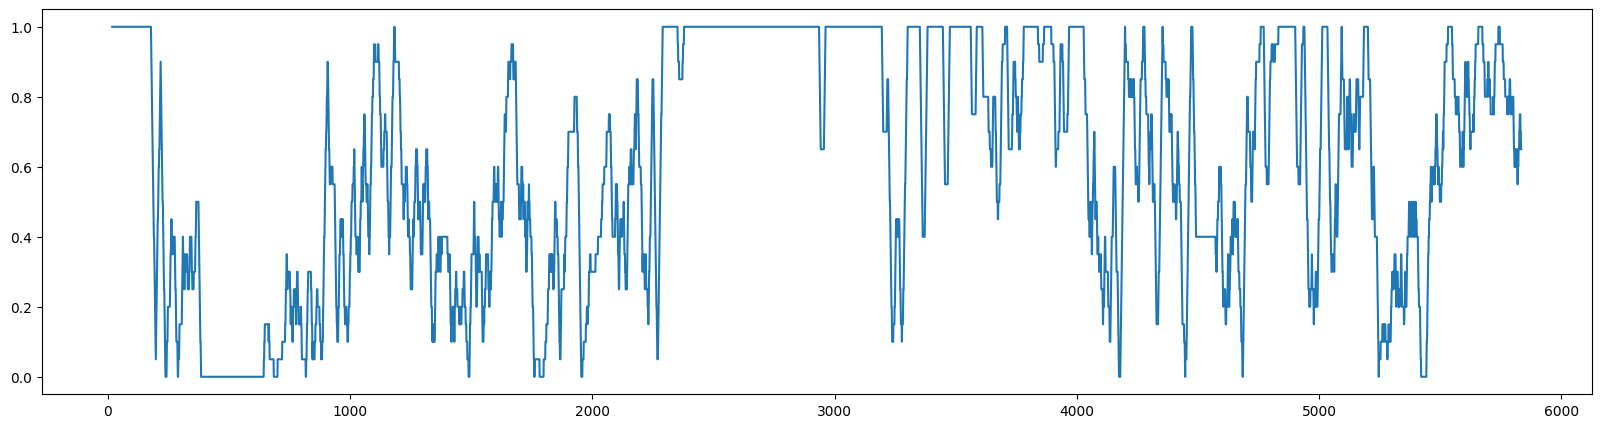

In [458]:
final["answer"].rolling(20).mean().plot(figsize=(20,5))

In [459]:
# dtype = int
final["answer"] = final["answer"].astype(int)
final["answer"]

0       1
1       1
2       1
3       1
4       1
       ..
5830    0
5831    0
5832    1
5833    0
5834    1
Name: answer, Length: 5835, dtype: int32

In [460]:
# final.to_csv(r"D:\.VScode\SuperAI4\thaiLegal\submission_ensemble_franken2.csv", index=False)

In [461]:
sum(final["answer"] == pd.read_csv(r"D:\.VScode\SuperAI4\thaiLegal\final.csv")["answer"]) / len(final["answer"])

1.0